In [1]:
#import os
#import shutil
#os.remove("./BRAIN_model.hdf5")
#shutil.rmtree("./Final_Dataset")
#os.remove("./model_plot.png")

# Checking Dependencies of code if not available to Install them

In [2]:
!pip install keras
!pip install tensorflow
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install imutils

     |████████████████████████████████| 5.8 MB 1.3 MB/s eta 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.18.0 requires tensorflow-io-gcs-filesystem==0.18.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
beatrix-jupyterlab 3.1.1 requires google-cloud-bigquery-storage, whic

# Import Statements

In [3]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
import random
import shutil
from os import listdir
import time
import imutils
import cv2
%matplotlib inline

# Making New Directory To Store Final Dataset

## Creating Root Directory

In [4]:
MYDIR = ("./Final_Dataset")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")

created folder :  ./Final_Dataset


## Creating Sub Directory

In [5]:
MYDIR = ("./Final_Dataset/yes")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")

created folder :  ./Final_Dataset/yes


In [6]:
MYDIR = ("./Final_Dataset/no")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")

created folder :  ./Final_Dataset/no


# Checking contents of each dataset in original form(before augmentation)

The Code Segment Below Checks for the number of Tumorous and Non Tumorous Images

In [7]:
def original_data_summary(main_path):
    
    yes_path = main_path+'yes'
    no_path = main_path+'no'
        
    # number of files (images) that are in the the folder named 'yes' that represent tumorous (positive) examples
    m_pos = len(listdir(yes_path))
    # number of files (images) that are in the the folder named 'no' that represent non-tumorous (negative) examples
    m_neg = len(listdir(no_path))
    # number of all examples
    m = (m_pos+m_neg)
    
    pos_prec = (m_pos* 100.0)/ m
    neg_prec = (m_neg* 100.0)/ m
    
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec}%, number of pos examples: {m_pos}") 
    print(f"Percentage of negative examples: {neg_prec}%, number of neg examples: {m_neg}")

Dataset 1 : Brain MRI Images for Brain Tumor Detection

In [8]:
original_data_path = "../input/brain-mri-images-for-brain-tumor-detection/"
original_data_summary(original_data_path)

Number of examples: 253
Percentage of positive examples: 61.26482213438735%, number of pos examples: 155
Percentage of negative examples: 38.73517786561265%, number of neg examples: 98


Dataset 2 : brain-tumor-detection

In [9]:
original_data_path = "../input/brain-tumor-detection/"
original_data_summary(original_data_path)

Number of examples: 3000
Percentage of positive examples: 50.0%, number of pos examples: 1500
Percentage of negative examples: 50.0%, number of neg examples: 1500


# Augmenting Data

Since our Dataset 1 has less number of images, we will be augmenting them. Also we'll reduce the data imbalance in the dataset.

The Augmentation has been done on a local system.

# Updated Contents of the Datasets:

Dataset 1:

In [10]:
def augmented_data_summary(main_path):
    
    yes_path = main_path+'/yes/yes'
    no_path = main_path+'/no/no'
        
    # number of files (images) that are in the the folder named 'yes' that represent tumorous (positive) examples
    m_pos = len(listdir(yes_path))
    # number of files (images) that are in the the folder named 'no' that represent non-tumorous (negative) examples
    m_neg = len(listdir(no_path))
    # number of all examples
    m = (m_pos+m_neg)
    
    pos_prec = (m_pos* 100.0)/ m
    neg_prec = (m_neg* 100.0)/ m
    
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec}%, number of pos examples: {m_pos}") 
    print(f"Percentage of negative examples: {neg_prec}%, number of neg examples: {m_neg}")

In [11]:
augmented_data_path = "../input/augmented-dataset/"
augmented_data_summary(augmented_data_path)

Number of examples: 2063
Percentage of positive examples: 52.49636451769268%, number of pos examples: 1083
Percentage of negative examples: 47.50363548230732%, number of neg examples: 980


Dataset 2:

In [12]:
original_data_path = "../input/brain-tumor-detection/"
original_data_summary(original_data_path)

Number of examples: 3000
Percentage of positive examples: 50.0%, number of pos examples: 1500
Percentage of negative examples: 50.0%, number of neg examples: 1500


# Creating the Final Dataset For Training

## Copying files from Augmented Dataset into Final Directory

### Copying Yes Folder

In [13]:
from distutils.dir_util import copy_tree

fromDirectory = "../input/augmented-dataset/yes/yes/"
toDirectory = "./Final_Dataset/yes/"

copy_tree(fromDirectory,toDirectory)

['./Final_Dataset/yes/aug_Y148_0_772.jpg',
 './Final_Dataset/yes/aug_Y45_0_2768.jpg',
 './Final_Dataset/yes/aug_Y252_0_9197.jpg',
 './Final_Dataset/yes/aug_Y107_0_6433.jpg',
 './Final_Dataset/yes/aug_Y38_0_1140.jpg',
 './Final_Dataset/yes/aug_Y61_0_8584.jpg',
 './Final_Dataset/yes/aug_Y162_0_1734.jpg',
 './Final_Dataset/yes/aug_Y253_0_4214.jpg',
 './Final_Dataset/yes/aug_Y168_0_3903.jpg',
 './Final_Dataset/yes/aug_Y92_0_624.jpg',
 './Final_Dataset/yes/aug_Y65_0_2713.jpg',
 './Final_Dataset/yes/aug_Y146_0_2517.jpg',
 './Final_Dataset/yes/aug_Y180_0_6774.jpg',
 './Final_Dataset/yes/aug_Y256_0_5384.jpg',
 './Final_Dataset/yes/aug_Y92_0_88.jpg',
 './Final_Dataset/yes/aug_Y167_0_9414.jpg',
 './Final_Dataset/yes/aug_Y181_0_2101.jpg',
 './Final_Dataset/yes/aug_Y167_0_4213.jpg',
 './Final_Dataset/yes/aug_Y102_0_2364.jpg',
 './Final_Dataset/yes/aug_Y17_0_5364.jpg',
 './Final_Dataset/yes/aug_Y79_0_6081.jpg',
 './Final_Dataset/yes/aug_Y2_0_1530.jpg',
 './Final_Dataset/yes/aug_Y120_0_6511.jpg',
 '

### Copying No Folder

In [14]:
from distutils.dir_util import copy_tree

fromDirectory = "../input/augmented-dataset/no/no/"
toDirectory = "./Final_Dataset/no/"

copy_tree(fromDirectory,toDirectory)

['./Final_Dataset/no/aug_46 no_0_3620.jpg',
 './Final_Dataset/no/aug_6 no_0_278.jpg',
 './Final_Dataset/no/aug_7 no_0_8761.jpg',
 './Final_Dataset/no/aug_25 no_0_4135.jpg',
 './Final_Dataset/no/aug_1 no._0_7804.jpg',
 './Final_Dataset/no/aug_N21_0_8054.jpg',
 './Final_Dataset/no/aug_no_0_6728.jpg',
 './Final_Dataset/no/aug_No15_0_7752.jpg',
 './Final_Dataset/no/aug_49 no_0_6724.jpg',
 './Final_Dataset/no/aug_27 no_0_5517.jpg',
 './Final_Dataset/no/aug_42 no_0_3958.jpg',
 './Final_Dataset/no/aug_No20_0_9725.jpg',
 './Final_Dataset/no/aug_8 no_0_5368.jpg',
 './Final_Dataset/no/aug_N5_0_9959.jpg',
 './Final_Dataset/no/aug_49 no_0_2414.jpg',
 './Final_Dataset/no/aug_17 no_0_6737.jpg',
 './Final_Dataset/no/aug_15 no_0_4754.jpg',
 './Final_Dataset/no/aug_28 no_0_80.jpg',
 './Final_Dataset/no/aug_no 6_0_3093.jpg',
 './Final_Dataset/no/aug_N1_0_6162.jpg',
 './Final_Dataset/no/aug_no 100_0_7570.jpg',
 './Final_Dataset/no/aug_48 no._0_3030.jpg',
 './Final_Dataset/no/aug_no 923_0_5939.jpg',
 './F

## Copying files from Dataset 2 into Final Directory

### Copying Yes Folder

In [15]:
from distutils.dir_util import copy_tree

fromDirectory = "../input/brain-tumor-detection/yes/"
toDirectory = "./Final_Dataset/yes/"

copy_tree(fromDirectory,toDirectory)

['./Final_Dataset/yes/y925.jpg',
 './Final_Dataset/yes/y424.jpg',
 './Final_Dataset/yes/y708.jpg',
 './Final_Dataset/yes/y115.jpg',
 './Final_Dataset/yes/y504.jpg',
 './Final_Dataset/yes/y1206.jpg',
 './Final_Dataset/yes/y192.jpg',
 './Final_Dataset/yes/y217.jpg',
 './Final_Dataset/yes/y937.jpg',
 './Final_Dataset/yes/y162.jpg',
 './Final_Dataset/yes/y9.jpg',
 './Final_Dataset/yes/y511.jpg',
 './Final_Dataset/yes/y717.jpg',
 './Final_Dataset/yes/y635.jpg',
 './Final_Dataset/yes/y769.jpg',
 './Final_Dataset/yes/y1348.jpg',
 './Final_Dataset/yes/y134.jpg',
 './Final_Dataset/yes/y987.jpg',
 './Final_Dataset/yes/y1245.jpg',
 './Final_Dataset/yes/y724.jpg',
 './Final_Dataset/yes/y1496.jpg',
 './Final_Dataset/yes/y1446.jpg',
 './Final_Dataset/yes/y840.jpg',
 './Final_Dataset/yes/y994.jpg',
 './Final_Dataset/yes/y1255.jpg',
 './Final_Dataset/yes/y1440.jpg',
 './Final_Dataset/yes/y1276.jpg',
 './Final_Dataset/yes/y108.jpg',
 './Final_Dataset/yes/y1433.jpg',
 './Final_Dataset/yes/y737.jpg',
 '.

### Copying No Folder

In [16]:
from distutils.dir_util import copy_tree

fromDirectory = "../input/brain-tumor-detection/no/"
toDirectory = "./Final_Dataset/no/"

copy_tree(fromDirectory,toDirectory)

['./Final_Dataset/no/no26.jpg',
 './Final_Dataset/no/no979.jpg',
 './Final_Dataset/no/no598.jpg',
 './Final_Dataset/no/no141.jpg',
 './Final_Dataset/no/no715.jpg',
 './Final_Dataset/no/no122.jpg',
 './Final_Dataset/no/no457.jpg',
 './Final_Dataset/no/no895.jpg',
 './Final_Dataset/no/no446.jpg',
 './Final_Dataset/no/no395.jpg',
 './Final_Dataset/no/no89.jpg',
 './Final_Dataset/no/no632.jpg',
 './Final_Dataset/no/no420.jpg',
 './Final_Dataset/no/no634.jpg',
 './Final_Dataset/no/no1142.jpg',
 './Final_Dataset/no/no473.jpg',
 './Final_Dataset/no/no1244.jpg',
 './Final_Dataset/no/no474.jpg',
 './Final_Dataset/no/no706.jpg',
 './Final_Dataset/no/no161.jpg',
 './Final_Dataset/no/no142.jpg',
 './Final_Dataset/no/no849.jpg',
 './Final_Dataset/no/no1335.jpg',
 './Final_Dataset/no/no1087.jpg',
 './Final_Dataset/no/no96.jpg',
 './Final_Dataset/no/no997.jpg',
 './Final_Dataset/no/no1321.jpg',
 './Final_Dataset/no/no169.jpg',
 './Final_Dataset/no/no692.jpg',
 './Final_Dataset/no/No18.jpg',
 './Final

# Verifying Contents of Final Directory:

In [17]:
original_data_path = "./Final_Dataset/"
original_data_summary(original_data_path)

Number of examples: 5063
Percentage of positive examples: 51.01718348805056%, number of pos examples: 2583
Percentage of negative examples: 48.98281651194944%, number of neg examples: 2480


# One Hot Encoding the Target Classes

![One Hot Encoding](https://datagy.io/wp-content/uploads/2021/02/pandas-one-hot-encoding.001-1024x576.png)

In [18]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 is tumorous
# 1 is non-tumorous

OneHotEncoder()

# Creating 3 Important Lists --

1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

In [19]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'./Final_Dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))          

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [20]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"./Final_Dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [21]:
data = np.array(data)
data.shape

(4954, 128, 128, 3)

In [22]:
result = np.array(result)
result = result.reshape(4954,2)

# Splitting the Data into Training , Testing & Validation

In [23]:
x_train, x_test_val, y_train, y_test_val = train_test_split(data, result, test_size=0.3, shuffle=True, random_state=0)
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.5, shuffle = True, random_state=0)

In [24]:
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of development examples = " + str(x_val.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_val (dev) shape: " + str(x_val.shape))
print ("Y_val (dev) shape: " + str(y_val.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 3467
number of development examples = 744
number of test examples = 743
X_train shape: (3467, 128, 128, 3)
Y_train shape: (3467, 2)
X_val (dev) shape: (744, 128, 128, 3)
Y_val (dev) shape: (744, 2)
X_test shape: (743, 128, 128, 3)
Y_test shape: (743, 2)


# Model Building

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [25]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax', metrics = ["accuracy"])



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

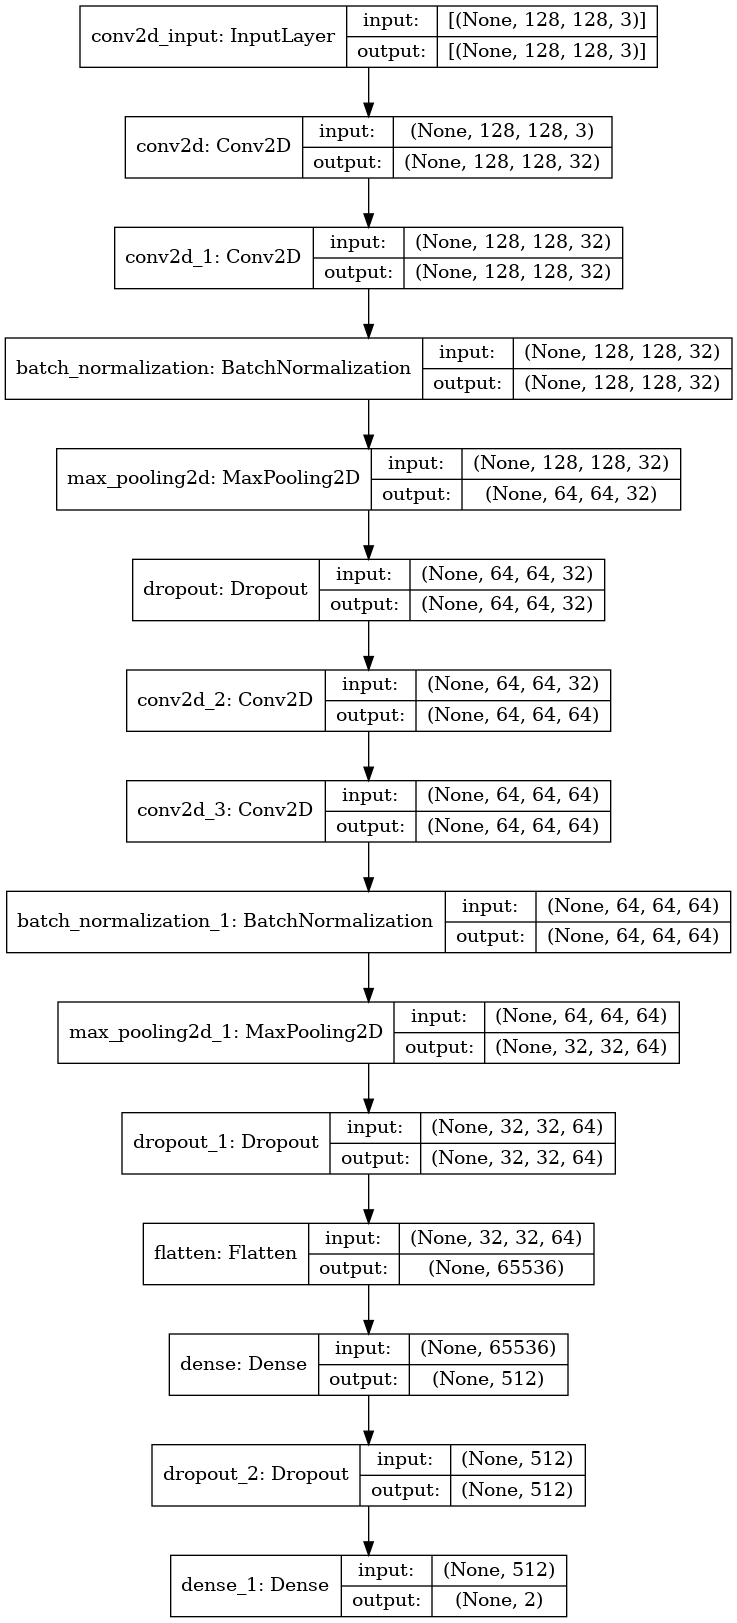

In [27]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [28]:
y_train.shape

(3467, 2)

# Creating Callbacks

In [29]:
es = EarlyStopping(monitor='val_loss',
                  mode='min',
                  verbose=1,
                  patience=10)
checkpoint = ModelCheckpoint(filepath='BRAIN_model.hdf5',
                            verbose=1,
                            save_best_only=True)
my_callbacks = [es, checkpoint]

# Training The Model

In [30]:
history = model.fit(x_train, y_train, epochs = 40, batch_size = 32, verbose = 1,validation_data = (x_val, y_val), callbacks=[es,checkpoint])

2021-12-26 08:03:13.622418: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
109/109 [==============================] - 74s 665ms/step - loss: 3.7666 - accuracy: 0.7219 - val_loss: 0.4718 - val_accuracy: 0.7890

Epoch 00001: val_loss improved from inf to 0.47179, saving model to BRAIN_model.hdf5
Epoch 2/40
109/109 [==============================] - 73s 670ms/step - loss: 0.4167 - accuracy: 0.8272 - val_loss: 0.4335 - val_accuracy: 0.8253

Epoch 00002: val_loss improved from 0.47179 to 0.43346, saving model to BRAIN_model.hdf5
Epoch 3/40
109/109 [==============================] - 74s 674ms/step - loss: 0.3090 - accuracy: 0.8728 - val_loss: 0.5242 - val_accuracy: 0.8185

Epoch 00003: val_loss did not improve from 0.43346
Epoch 4/40
109/109 [==============================] - 72s 660ms/step - loss: 0.2305 - accuracy: 0.9086 - val_loss: 0.4221 - val_accuracy: 0.8629

Epoch 00004: val_loss improved from 0.43346 to 0.42214, saving model to BRAIN_model.hdf5
Epoch 5/40
109/109 [==============================] - 72s 664ms/step - loss: 0.1801 - accuracy: 0.9328

In [31]:
history = model.history.history

In [32]:
for key in history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


# Plotting Graphs

In [33]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

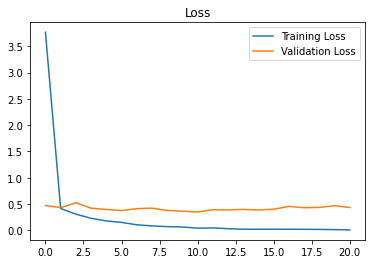

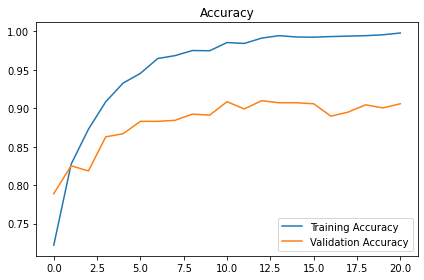

In [34]:
plot_metrics(history)

# Evaluating The Model

In [35]:
from tensorflow.keras.models import Model, load_model
loadmodel = load_model(filepath='./BRAIN_model.hdf5')

In [36]:
loadmodel.metrics_names

['loss', 'accuracy']

In [37]:
loss, acc = loadmodel.evaluate(x=x_test, y=y_test)

24/24 [==============================] - 4s 157ms/step - loss: 0.2737 - accuracy: 0.9206


In [38]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

Test Loss = 0.2736566364765167
Test Accuracy = 0.920592188835144


# Testing Model On Random Images

In [39]:
def names(number):
    if(number == 0):
        return 'a tumor'
    else:
        return 'not a tumor'

99.21991229057312% Confidence This is a tumor


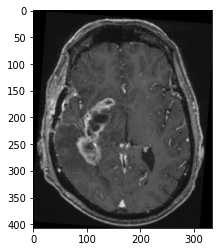

In [40]:
from matplotlib.pyplot import imshow
img = Image.open("../input/brain-tumor-detection/pred/pred11.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This is ' + names(classification))

99.9995470046997% Confidence This is a tumor


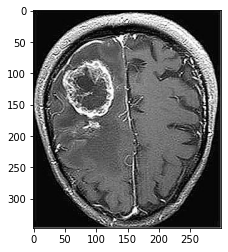

In [41]:
# from matplotlib.pyplot import imshow
img = Image.open("../input/brain-tumor-detection/yes/y1006.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This is ' + names(classification))

99.85893368721008% Confidence This is not a tumor


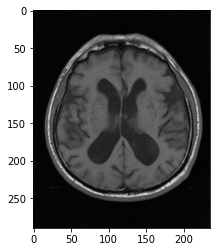

In [42]:
# from matplotlib.pyplot import imshow
img = Image.open("../input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (100).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This is ' + names(classification))

99.94693398475647% Confidence This is a tumor


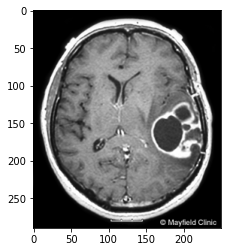

In [43]:
# from matplotlib.pyplot import imshow
img = Image.open("../input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This is ' + names(classification))

100.0% Confidence This is not a tumor


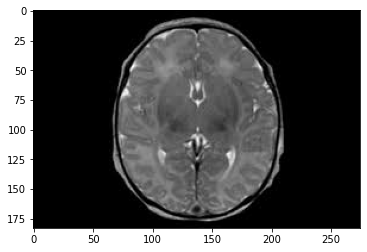

In [44]:
# from matplotlib.pyplot import imshow
img = Image.open("../input/brain-mri-images-for-brain-tumor-detection/no/12 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This is ' + names(classification))

100.0% Confidence This is a tumor


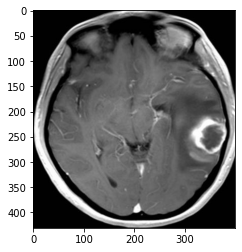

In [45]:
# from matplotlib.pyplot import imshow
img = Image.open("../input/brain-mri-images-for-brain-tumor-detection/yes/Y154.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This is ' + names(classification))

99.9987244606018% Confidence This is a tumor


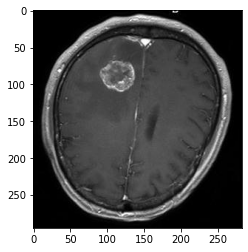

In [46]:
# from matplotlib.pyplot import imshow
img = Image.open("../input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1021).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This is ' + names(classification))